In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [224, 224] #for resizing all image

In [3]:
train_path = '/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/dataset/train'
valid_path = '/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/dataset/test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 182s 3us/step


In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
 # useful for getting number of classes
folders = glob('/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1178 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 194 images belonging to 2 classes.


In [18]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
37/37 [==============================] - 370s 10s/step - loss: 0.3855 - accuracy: 0.8447 - val_loss: 0.7329 - val_accuracy: 0.9588
Epoch 2/5
37/37 [==============================] - 366s 10s/step - loss: 0.0323 - accuracy: 0.9932 - val_loss: 7.9201e-04 - val_accuracy: 0.9691
Epoch 3/5
37/37 [==============================] - 365s 10s/step - loss: 0.0166 - accuracy: 0.9983 - val_loss: 2.3115e-04 - val_accuracy: 0.9639
Epoch 4/5
37/37 [==============================] - 366s 10s/step - loss: 0.0158 - accuracy: 0.9975 - val_loss: 0.9720 - val_accuracy: 0.9742
Epoch 5/5
37/37 [==============================] - 362s 10s/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 9.2983e-06 - val_accuracy: 0.9742


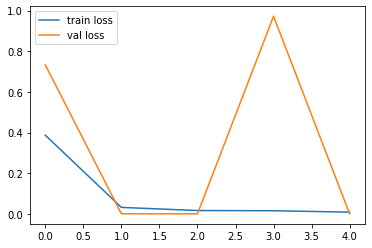

<Figure size 432x288 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

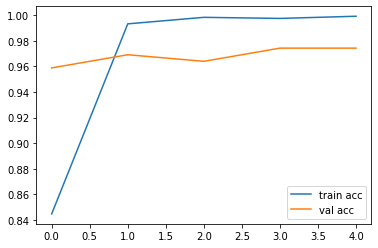

<Figure size 432x288 with 0 Axes>

In [20]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
import tensorflow as tf

In [22]:
from keras.models import load_model

In [23]:
model.save('Mask_detector_model.h5')